Decision Tree

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip install --user pydotplus 


     |████████████████████████████████| 286kB 7.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


1- Dataset

Load the dataset:

In [3]:
## 1- Load the dataset
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-02-24 12:32:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.07s   

2020-02-24 12:32:07 (272 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [4]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

Using my_data as the Drug.csv data read by pandas, declare the following variables:

    X as the Feature Matrix (data of my_data)
    y as the response vector (target)

Remove the column containing the ID.


In [6]:
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [7]:
y = cell_df["Class"]
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

Setting up the Decision Tree
We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation. 

In [8]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

2- Model

We will first create an instance of the DecisionTreeClassifier called cancerTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node. 

In [10]:
cancerTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
cancerTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset


In [11]:
cancerTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predTree = cancerTree.predict(X_testset)

In [13]:
print (predTree [0:5])
print (y_testset [0:5])


[2 2 2 4 4]
595    2
348    4
660    2
210    4
427    4
Name: Class, dtype: int64


3- Evaluation

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9414634146341463


Using f1-score:

In [15]:
from sklearn.metrics import f1_score
f1_score(y_testset, predTree, average='weighted')

0.9413051915096874

Using Jaccard

In [16]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, predTree)

0.9414634146341463

Visualisation

In [20]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [21]:
#!conda install -c conda-forge pydotplus -y

In [22]:
#!conda install -c conda-forge python-graphviz -y

In [23]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

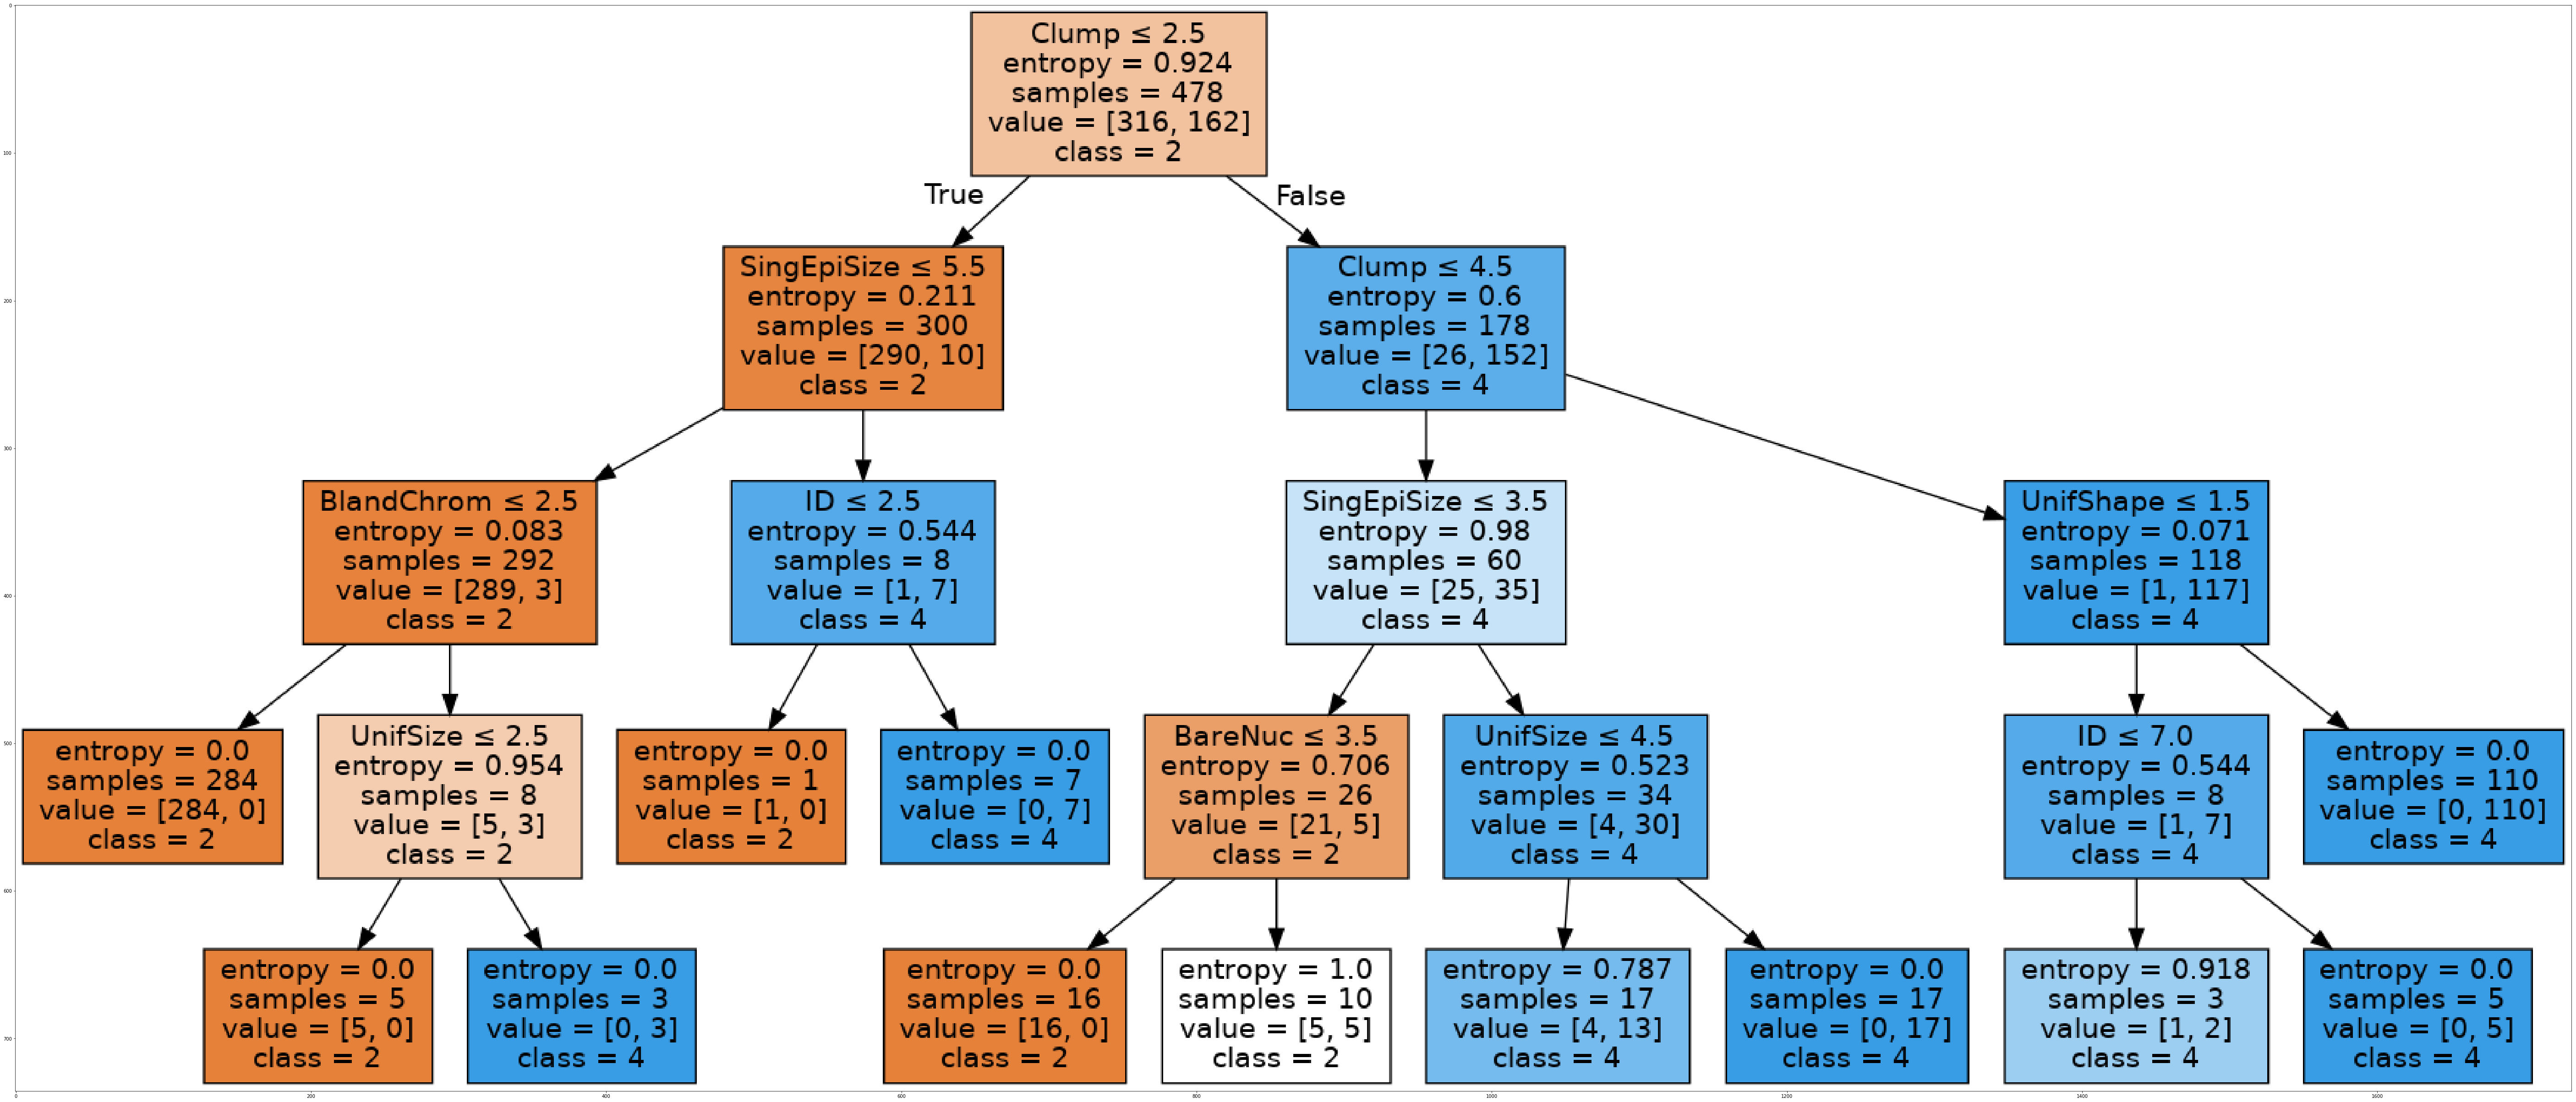

In [24]:
dot_data = StringIO()
filename = "cancertree.png"
featureNames = cell_df.columns[0:9]
targetNames = cell_df["Class"].unique().tolist()
out=tree.export_graphviz(cancerTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')